In [2]:
import numpy as np
from pprint import pprint

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.model_selection import cross_validate, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import log_loss, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

from scipy.stats import loguniform

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8, 6))

import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)

Binary classification with SGDRegressor on MNIST data

In [5]:
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
X = X_pd.to_numpy()
y = y_pd.to_numpy()

We'll use a sigmoid function for the loss calculation here, so feature matrix should be scaled from 0 to 1.

In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(f'Mean of the features: {np.mean(X)}')
print(f'Std.deviation: {np.std(X)}')
print(f'Minimum value: {np.min(X)}')
print(f'Maximum value: {np.max(X)}')

Mean of the features: 0.13092720382627604
Std.deviation: 0.3084510570135976
Minimum value: 0.0
Maximum value: 1.0


In [8]:
target_names = np.unique(y)
print(f'Number of samples: {X.shape[0]}, type: {X.dtype}')
print(f'NUmber of features: {X.shape[1]}')
print(f'Number of classes: {len(target_names)}, type: {y.dtype}')
print(f'Labels: {target_names}')

Number of samples: 70000, type: float64
NUmber of features: 784
Number of classes: 10, type: object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

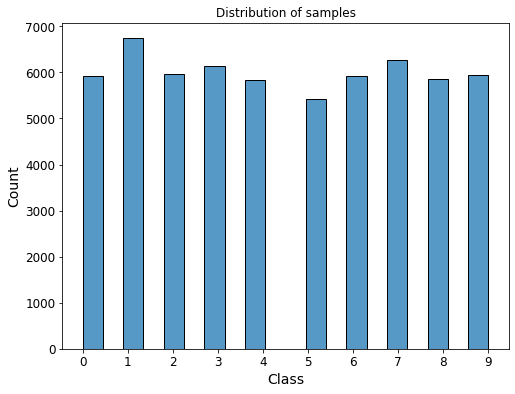

In [11]:
plt.figure()
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of samples')
plt.show()

In [12]:
#initialize new variable names with all 0
y_train_0 = np.zeros(y_train.shape[0])
y_test_0 = np.zeros(y_test.shape[0])

#find indices of digit 0 image
indx_0 = np.where(y_train == '0')
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

print(y_train)
print(y_train_0)

['5' '0' '4' ... '5' '6' '8']
[0. 1. 0. ... 0. 0. 0.]


Dummy (Baseline) classifier

In [14]:
num_pos = len(np.where(y_train_0 == 1)[0])
num_neg = len(np.where(y_train_0 == 0)[0])

base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(X_train, y_train_0)
print(f'Training accuracy: {base_clf.score(X_train, y_train_0):.2f}')
print(f'Testing accuracy: {base_clf.score(X_test, y_test_0):.2f}')

Training accuracy: 0.90
Testing accuracy: 0.90


Reason is obvious.  The model would've predicted 54077 samples correctly just by output 0 for all nput samples, Therefore, the accuracy will be 54077/60000 = 90.12%